## Module 5 - In this jupyter notebook, target productivity and productivity gaps are calculated
* Step 5a - Set up
* Step 5b - Calculate the target productivity 
* Step 5c - Identify bright spots
* Step 5d - calculate productivity gaps 
**=============================================================================================**
![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig5.PNG?raw=true)
**=============================================================================================**

## Step 5a - Set up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## i) Import packages/libraries

In [2]:
import os
import sys
import glob

import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle                # from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.lines as mlines                       # helps to sync colorbar  height with the plot
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable  # helps to sync colorbar height with the plot
from matplotlib import pyplot as plt

# change the directory to where the modules are saved
sys.path.insert(0,'/content/drive/My Drive/WAPORWP/Modules')
from GIS_functions import GIS_function as gis

## Step 5b - Calculate the target productivity 

## i) Define function to plot productivity targets

In [3]:
def plotProductivityTargets (x, y, WP, title1,xlable1,ylable1,title2,xlable2,ylable2): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax1.scatter(y,
                WP,
                marker='*',color="grey")

    ax1.scatter(np.nanpercentile(y, 95),
                np.nanpercentile(WP, 95),
                marker='*', color='black', s=100)

    ax1.axvline(np.nanpercentile(y, 95),
                color="#EE6666", linestyle="--")
    
    ax1.axhline(np.nanpercentile(WP, 95),
                color="#EE6666", linestyle="--")    
    
    # ax2 for histogram
    counts, bins, patches = ax2.hist(WP, bins=100, facecolor='skyblue', edgecolor='none', histtype="bar")

    # add legend 
    fakeLine = plt.Line2D([0,0], [0,1], color="#EE6666", linestyle='--')
    fakemark = mlines.Line2D([], [], color='black', marker='*', markersize=10)
    ax2.legend([fakeLine, fakemark], ["95 percentile", 'Productivity target'])

    # Colours for different percentiles of the histogram
    twentyfifth, ninetyfifth = np.nanpercentile(WP, [5, 95])
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < twentyfifth:
            patch.set_facecolor('#EE6666')
        elif leftside > ninetyfifth:
            patch.set_facecolor('green')

    # create legend
    handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ['#EE6666', 'green']]
    labels = ["0-5 Percentile",">95 Percentile"]
    plt.legend(handles, labels)

    # Title  
    ax1.set_title(title1, fontsize=14)
    ax1.set_xlabel(xlable1, fontsize=13)
    ax1.set_ylabel(ylable1, fontsize=13)

    ax2.set_title(title2, fontsize=14)
    ax2.set_xlabel(xlable2, fontsize=13)
    ax2.set_ylabel(ylable2, fontsize=13)

    return None 

## ii) Calculate the target biomass and target biomass water productivity

## * Import the input data (seasonal ${ET_a}$, biomass and WPb raster data)

In [4]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"


input_ETfolder    = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_ETfhs       = sorted(glob.glob(input_ETfolder + '/*.tif'))

input_AGBMfolder  = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_AGBMfhs     = sorted(glob.glob(input_AGBMfolder + '/*.tif'))

input_WPbfolder   = os.path.join(dir_proj, dir_data, "4L2_WPb") 
input_WPbfhs      = sorted(glob.glob(input_WPbfolder + '/*.tif'))

input_ETfhs , input_AGBMfhs, input_WPbfhs

(['/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My

## ** Calculate the target biomass and target biomass WP

In [5]:
# Target productivity
TargetPercentile = 95  

                         Season  Target_biomass  Target_WPb
0  ETa 2015-10-01 to 2016-09-30           101.0         7.4
1  ETa 2016-10-01 to 2017-09-30           114.0         7.8
2  ETa 2017-10-01 to 2018-09-30           116.0         7.8
3  ETa 2018-10-01 to 2019-09-30           104.0         7.1
4  ETa 2019-10-01 to 2020-09-30           110.0         7.7


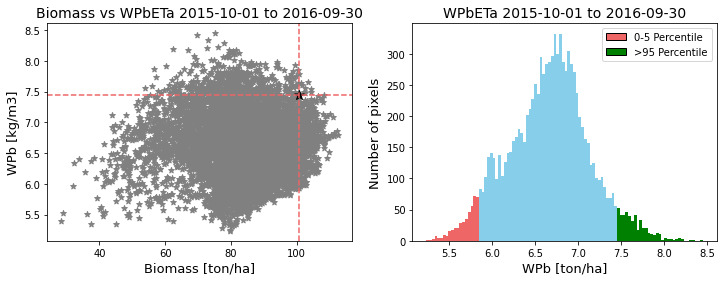

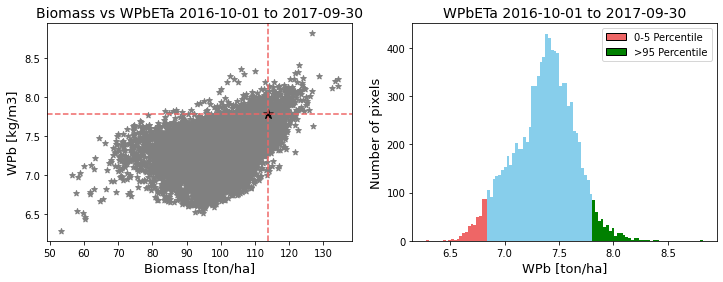

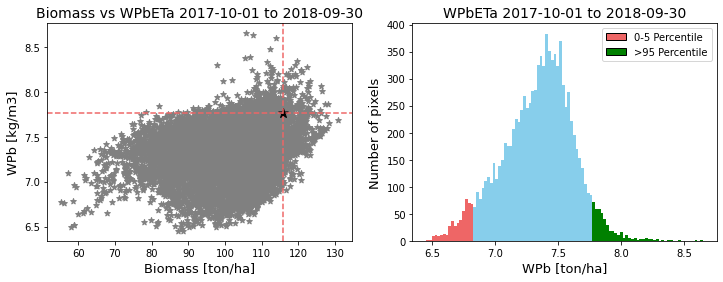

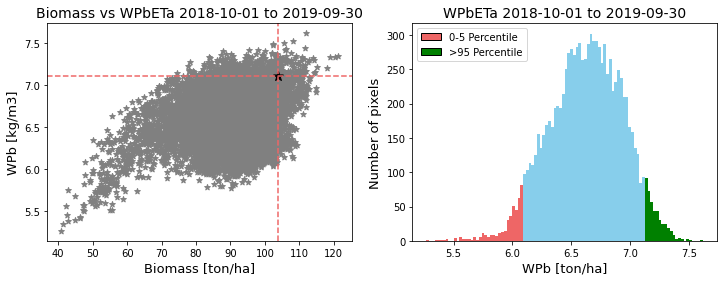

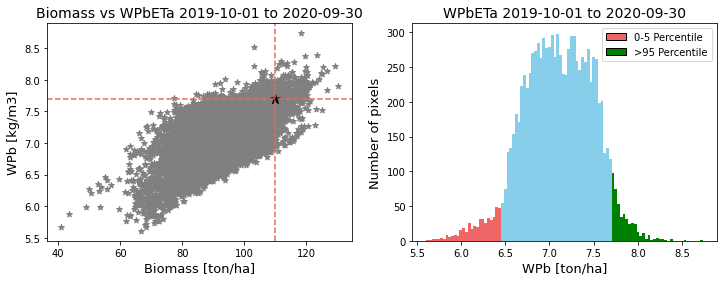

In [6]:
in_fh = input_ETfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

Season        = []
BiomassTarget = []
WPbTarget     = []

for in_fhET, in_fhAGBM, in_fhWPb in zip(input_ETfhs, input_AGBMfhs, input_WPbfhs): 
    AETI   = gis.OpenAsArray(in_fhET, nan_values=True) 
    AGBM   = gis.OpenAsArray(in_fhAGBM,  nan_values=True) 
    WPb    = gis.OpenAsArray(in_fhWPb, nan_values=True)
    
    # reshape the arrays
    AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
    Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])
    WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])
    
    # targets productivity
    Target_biomass = round(np.nanpercentile(Biomass_1D, TargetPercentile), 0)  # Yield at 95 percentile
    TargetWP       = round(np.nanpercentile(WPb_1D, TargetPercentile), 1)         # WP at 95 percentile
    
    # Identify the date and season from the file name
    date  = os.path.basename(in_fhET).split('.')[0].replace('AETI', '').replace('_', ' ')
    
    Season.append(date)
    BiomassTarget.append(Target_biomass)
    WPbTarget.append(TargetWP)
    
    # scatter plot of Yield vs WP and histogram of WP for 2017
    year = int(date.split (' ')[1].split('-')[0])
    
    title1  = 'Biomass vs WPb'+date
    xlable1 = 'Biomass [ton/ha]'
    ylable1 = 'WPb [kg/m3]'
    
    title2  = 'WPb'+date
    xlable2 = 'WPb [ton/ha]'
    ylable2 = 'Number of pixels'
    
    title1,xlable1,ylable1
    plotProductivityTargets(AETI_1D,  Biomass_1D, WPb_1D, title1,xlable1,ylable1, title2,xlable2,ylable2)

# save the data into dataframe - tabular form
data_tuples = list(zip(Season, BiomassTarget, WPbTarget))
df_targets = pd.DataFrame(data_tuples, columns=['Season', 'Target_biomass', 'Target_WPb'])
print(df_targets);

## iii) Calculate the target crop yield and target crop water productivity

## * Import the input data (seasonal ${ET_a}$, crop yield and WPc raster data)

In [7]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

input_ETfolder    = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_ETfhs       = sorted(glob.glob(input_ETfolder + '/*.tif'))

input_Yieldfolder  = os.path.join(dir_proj, dir_data, "4L2_Yield") 
input_Yieldfhs     = sorted(glob.glob(input_Yieldfolder + '/*.tif'))

input_WPyfolder   = os.path.join(dir_proj, dir_data, "4L2_WPy") 
input_WPyfhs      = sorted(glob.glob(input_WPyfolder + '/*.tif'))

input_ETfhs , input_Yieldfhs, input_WPyfhs

(['/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_WPy/WPy_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Driv

## ** Calculate the target crop yield and target crop WP

In [8]:
# Target productivity
TargetPercentile = 95  

                      Season  Target_yield  Target_WPy
0   2015-10-01 to 2016-09-30         101.0         7.4
1   2016-10-01 to 2017-09-30         114.0         7.8
2   2017-10-01 to 2018-09-30         116.0         7.8
3   2018-10-01 to 2019-09-30         104.0         7.1
4   2019-10-01 to 2020-09-30         110.0         7.7


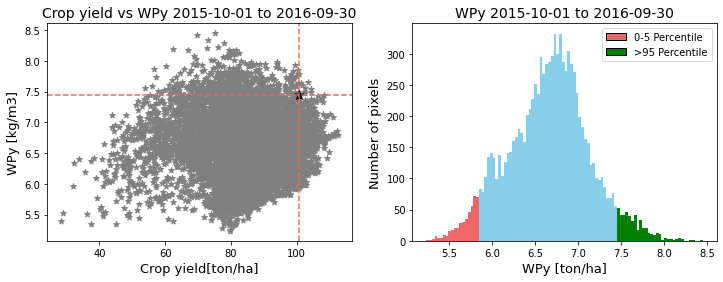

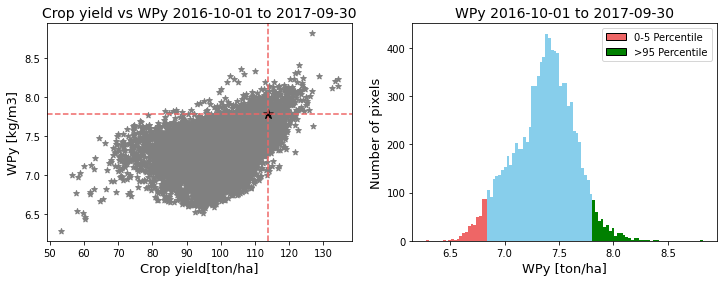

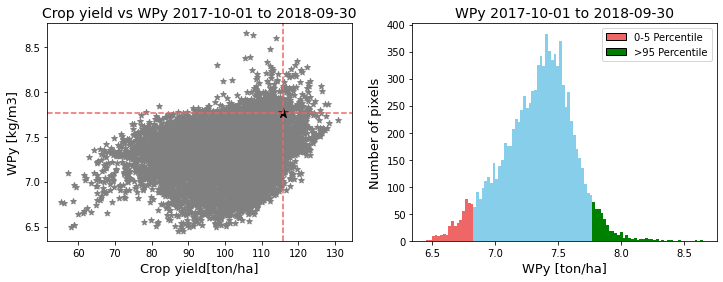

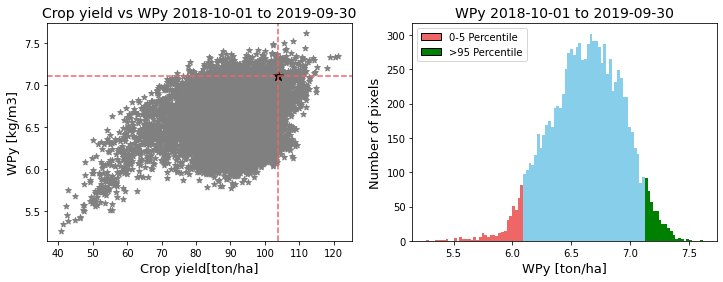

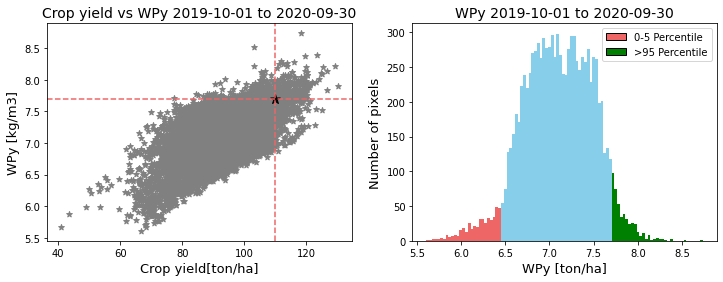

In [9]:
in_fh = input_ETfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

Season        = []
YieldTarget   = []
WPyTarget     = []

for in_fhET, in_fhYield, in_fhWPy in zip(input_ETfhs, input_Yieldfhs, input_WPyfhs): 
    AETI   = gis.OpenAsArray(in_fhET, nan_values=True) 
    Yield  = gis.OpenAsArray(in_fhYield,  nan_values=True) 
    WPy    = gis.OpenAsArray(in_fhWPy, nan_values=True)
    
    # reshape the arrays
    AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
    Yield_1D   = np.reshape(Yield, Yield.shape[0] * Yield.shape[1])
    WPy_1D     = np.reshape(WPy, WPy.shape[0] * WPy.shape[1])
    
    # targets productivity
    Target_yield   = round(np.nanpercentile(Yield_1D, TargetPercentile), 0)  # Yield at 95 percentile
    TargetWP       = round(np.nanpercentile(WPy_1D, TargetPercentile), 1)         # WP at 95 percentile
    
    # Identify the date and season from the file name
    date  = os.path.basename(in_fhET).split('.')[0].replace('ETa', '').replace('_', ' ')
    
    Season.append(date)
    YieldTarget.append(Target_yield)
    WPyTarget.append(TargetWP )
    
    # scatter plot of Yield vs WP and histogram of WP for 2017
    year = int(date.split (' ')[1].split('-')[0])
    
    title1  = 'Crop yield vs WPy'+date
    xlable1 = 'Crop yield[ton/ha]'
    ylable1 = 'WPy [kg/m3]'
    
    title2  = 'WPy'+date
    xlable2 = 'WPy [ton/ha]'
    ylable2 = 'Number of pixels'
    
    title1,xlable1,ylable1
    plotProductivityTargets(AETI_1D,  Yield_1D, WPy_1D, title1,xlable1,ylable1, title2,xlable2,ylable2)
        
    year += 1

# save the data into dataframe - tabular form
data_tuples = list(zip(Season, YieldTarget, WPyTarget))
df_targets = pd.DataFrame(data_tuples, columns=['Season', 'Target_yield', 'Target_WPy'])
print(df_targets);

## Step 5c - Identify bright spots 
* The bright spots are idetified based on the target biomass and target biomass water productivity (WPb)

## i) Import the input data (seasonal ${ET_a}$, biomass and WPb raster data)

In [10]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

input_ETfolder    = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_ETfhs       = sorted(glob.glob(input_ETfolder + '/*.tif'))

input_AGBMfolder  = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_AGBMfhs     = sorted(glob.glob(input_AGBMfolder + '/*.tif'))

input_WPbfolder   = os.path.join(dir_proj, dir_data, "4L2_WPb") 
input_WPbfhs      = sorted(glob.glob(input_WPbfolder + '/*.tif'))

input_ETfhs , input_AGBMfhs, input_WPbfhs

(['/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/2L2_AETI_season/ETa_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My

## ii) Map the bright spots in the study area

In [11]:
# Target productivity
TargetPercentile = 95  

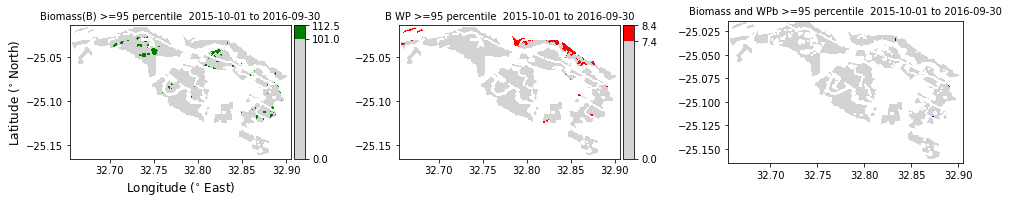

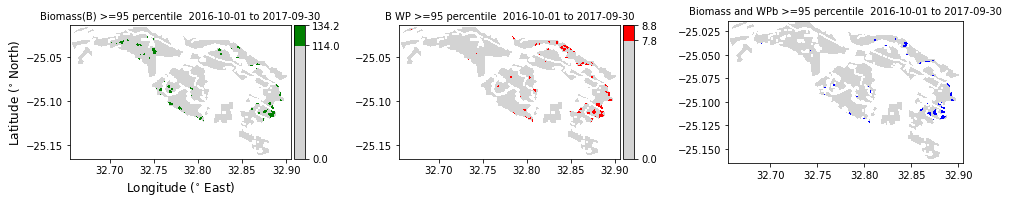

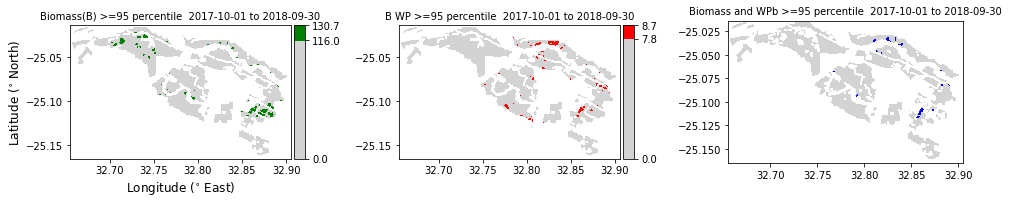

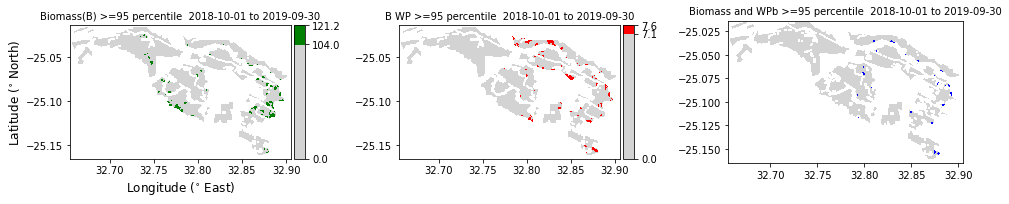

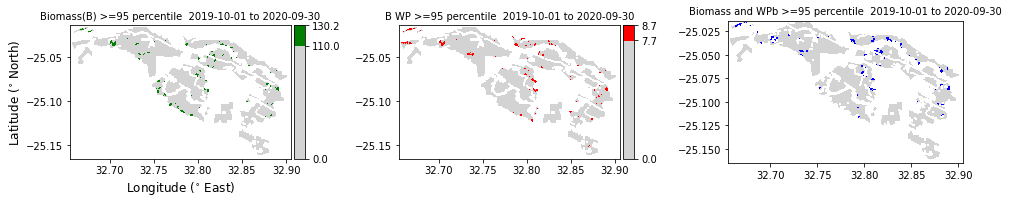

In [12]:
in_fh = input_ETfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhET, in_fhAGBM, in_fhWPb in zip(input_ETfhs, input_AGBMfhs, input_WPbfhs): 
    AETI   = gis.OpenAsArray(in_fhET, nan_values=True) 
    AGBM   = gis.OpenAsArray(in_fhAGBM,  nan_values=True) 
    WPb    = gis.OpenAsArray(in_fhWPb, nan_values=True)
    
    # reshape the arrays
    AETI_1D    = np.reshape(AETI, AETI.shape[0]*AETI.shape[1])
    Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])
    WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])
    
    # save the data into dataframe - tabular form
    data_tuples = list(zip(AETI_1D,Biomass_1D,WPb_1D))
    df          = pd.DataFrame(data_tuples, columns=['ETa','Biomass','WP'])
    
    # thresholds for the targets
    TargetBiomass = round(np.nanpercentile(Biomass_1D, TargetPercentile), 0)
    TargetWP      = round(np.nanpercentile(WPb_1D , TargetPercentile), 1)
    maxBiomass    = round(df["Biomass"].max(),1)
    maxWPb        = round(df["WP"].max(),1)
    
# Identify the date and season from the file name
    date  = os.path.basename(in_fhET).split('.')[0].replace('ETa', '').replace('_', ' ')
    
    ## Plot
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
    
    # ax1, plot raster map, highlight Yield greater than or equal to the target
    cmap1   = colors.ListedColormap(['lightgrey', 'green'])
    bounds1 = [0, TargetBiomass, maxBiomass]
    norm1   = colors.BoundaryNorm(bounds1, cmap1.N)
    
    img1     = ax1.imshow(AGBM, cmap=cmap1, norm=norm1, extent=spatial_extent)
    divider1 = make_axes_locatable(ax1)
    cax1     = divider1.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, spacing='proportional', ax=ax1, cax=cax1)
    ax1.set_title ('Biomass(B) >='+str(TargetPercentile)+ ' percentile ' + date, fontsize=10)
    
    ### add axes label
    ax1.set_xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    ax1.set_ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    
    # ax2, plot raster map, highlight Yield greater than or equal to the target 
    cmap2   = colors.ListedColormap(['lightgrey', 'red'])
    bounds2 = [0, TargetWP, maxWPb]
    norm2   = colors.BoundaryNorm(bounds2, cmap2.N)
 
    img2     = ax2.imshow(WPb, cmap=cmap2, norm=norm2, extent=spatial_extent)
    divider2 = make_axes_locatable(ax2)
    cax2     = divider2.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img2, spacing='proportional', ax=ax2, cax=cax2)
    ax2.set_title ('B WP >='+str(TargetPercentile)+ ' percentile ' + date, fontsize=10)  
    
    # ax3, plot raster map, highlight when both Yield and WP greater than or equal to the targets
    Biomass_targeSpots      = np.where(((AGBM >= TargetBiomass ) & (WPb >= TargetWP)), AGBM, np.nan)
    Biomass_WPb_targetSpots = np.where((AGBM  < TargetBiomass), 1, Biomass_targeSpots)

    cmap3   = colors.ListedColormap(['lightgrey', 'blue'])
    bounds3 = [0, TargetWP, maxWPb]
    norm3   = colors.BoundaryNorm(bounds3, cmap3.N)
 
    img3 = ax3.imshow(Biomass_WPb_targetSpots, cmap=cmap3, norm=norm3, extent=spatial_extent)
    # fig.colorbar(img3, spacing='proportional', ax=ax3)
    ax3.set_title ('Biomass and WPb >='+str(TargetPercentile)+ ' percentile ' + date, fontsize=10)  
    
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()
    ;

## Step 5d - Calculate productivity gaps
* i) Biomass gaps and biomass WP gaps
* ii)Crop yield gaps and crop WP gaps

## i) Biomass gaps and biomass water productivity gaps

## * Import the input data (biomass and WPb raster data)

In [13]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

input_AGBMfolder  = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_AGBMfhs     = sorted(glob.glob(input_AGBMfolder + '/*.tif'))

input_WPbfolder   = os.path.join(dir_proj, dir_data, "4L2_WPb") 
input_WPbfhs      = sorted(glob.glob(input_WPbfolder + '/*.tif'))

input_AGBMfhs, input_WPbfhs

(['/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Biomass/AGBM_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2019-10-01_to_2020-09-30.tif'])

## * Output folder: Make one or connect to the existing one

In [14]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

output_folder1 = os.path.join(dir_proj, dir_data, "5L2_BiomassGaps") 
output_folder2 = os.path.join(dir_proj, dir_data, "5L2_WPbgaps") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folder1):
    os.makedirs(output_folder1) 
if not os.path.exists(output_folder2):
    os.makedirs(output_folder2)

output_folder1, output_folder2

('/content/drive/My Drive/WAPORWP/Data/5L2_BiomassGaps',
 '/content/drive/My Drive/WAPORWP/Data/5L2_WPbgaps')

## ** Biomass gaps

In [15]:
# Target productivity
TargetPercentile = 95  

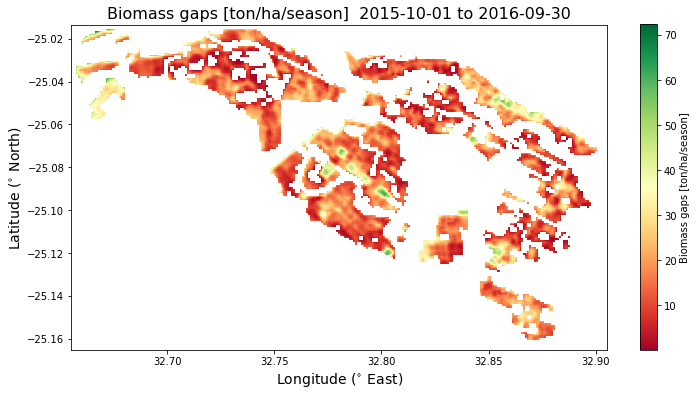

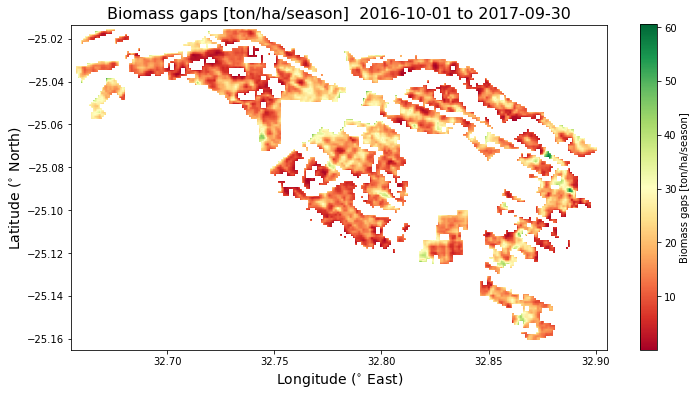

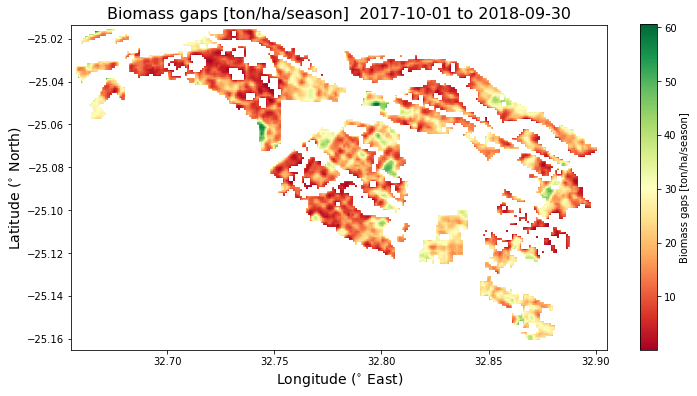

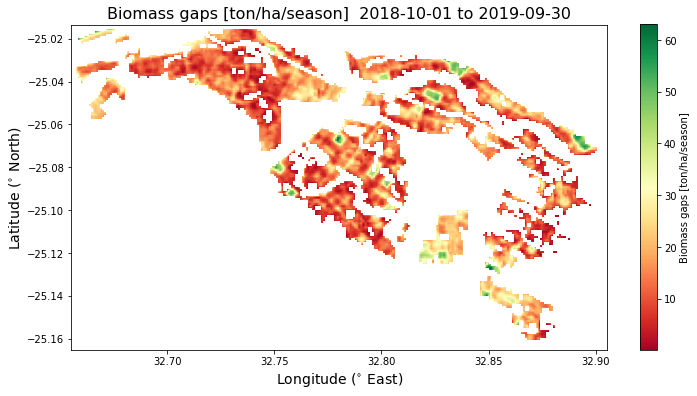

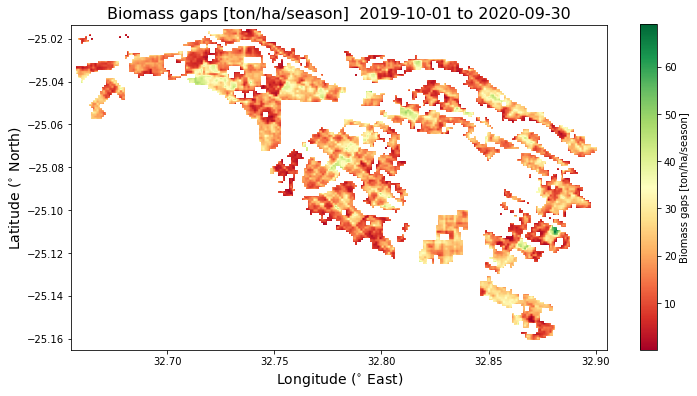

In [16]:
in_fh = input_AGBMfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhAGBM in input_AGBMfhs: 
    AGBM = gis.OpenAsArray(in_fhAGBM, nan_values=True) 
    
    # productivity targets and produtivity gaps
    Biomass_1D = np.reshape(AGBM, AGBM.shape[0] * AGBM.shape[1])  # reshape the arrays
    TargetBiomass = round(np.nanpercentile(Biomass_1D, TargetPercentile), 1)
    Biomassgap = np.where( AGBM < TargetBiomass, TargetBiomass - AGBM, np.nan)
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhAGBM).split('.')[0].replace('AGBM', '').replace('_', ' ')
    
    # save yield gap
    output_folder = output_folder1
    basename      = os.path.basename(in_fhAGBM).replace('AGBM','BiomassGaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, Biomassgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal = Biomassgap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label ='Biomass gaps [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Biomass gaps [ton/ha/season] ' + date, fontsize=16)
    plt.show () 
    ;

## *** Biomass WP gaps (WPb gaps)

In [17]:
# Target productivity
TargetPercentile = 95  

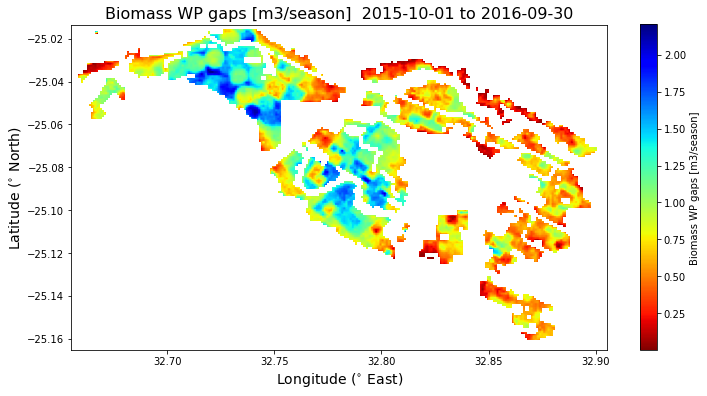

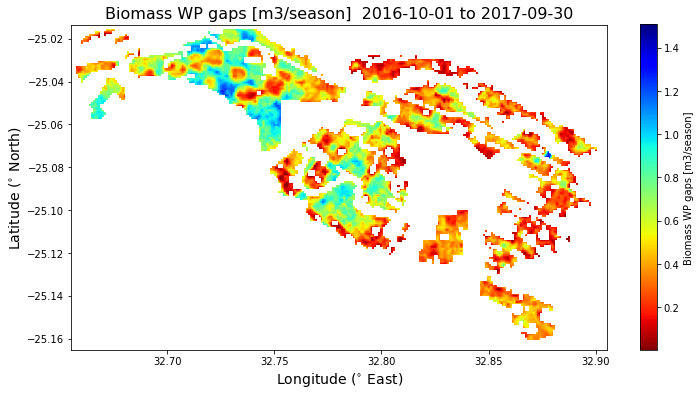

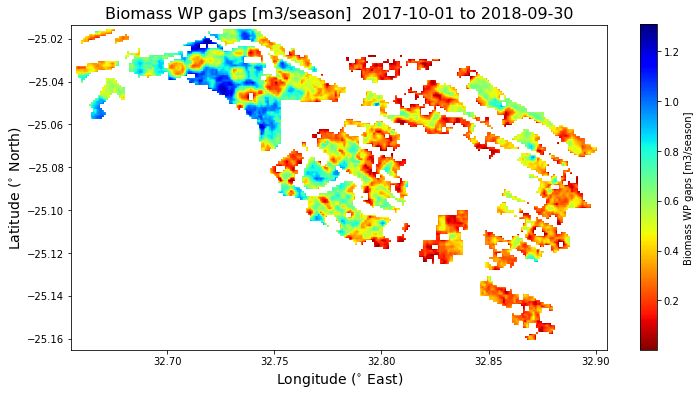

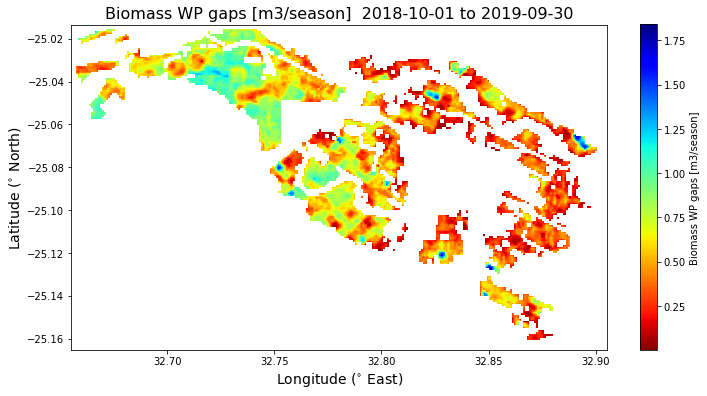

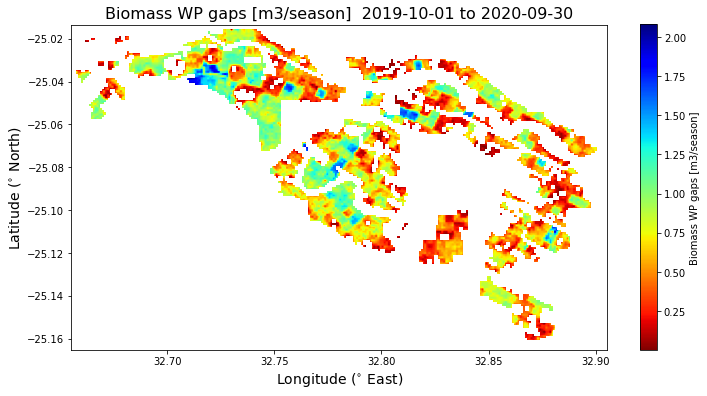

In [18]:
in_fh = input_WPbfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhWPb in input_WPbfhs: 
    WPb = gis.OpenAsArray(in_fhWPb, nan_values=True) 
    
    # productivity targets and produtivity gaps
    WPb_1D     = np.reshape(WPb, WPb.shape[0] * WPb.shape[1])  # reshape the arrays
    TargetWPb  = round(np.nanpercentile(WPb_1D, TargetPercentile), 2)
    WPbgap     = np.where( WPb < TargetWPb, TargetWPb - WPb, np.nan)
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhWPb).split('.')[0].replace('WPb', '').replace('_', ' ')
    
    # save yield gap
    output_folder = output_folder2
    basename      = os.path.basename(in_fhWPb).replace('WPb','WPbGaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn,  WPbgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal =  WPbgap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='jet_r', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label = 'Biomass WP gaps [m3/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Biomass WP gaps [m3/season] ' + date, fontsize= 16)
    plt.show () 
    ;

## ii) Crop yield gaps and crop water productivity gaps

## * Import the input data (biomass and WPb raster data)

In [19]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

input_AGBMfolder  = os.path.join(dir_proj, dir_data, "4L2_Yield") 
input_Yieldfhs     = sorted(glob.glob(input_AGBMfolder + '/*.tif'))

input_WPyfolder   = os.path.join(dir_proj, dir_data, "4L2_WPy") 
input_WPyfhs      = sorted(glob.glob(input_WPyfolder + '/*.tif'))

input_Yieldfhs, input_WPbfhs

(['/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_Yield/Yield_2019-10-01_to_2020-09-30.tif'],
 ['/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2015-10-01_to_2016-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2016-10-01_to_2017-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2017-10-01_to_2018-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2018-10-01_to_2019-09-30.tif',
  '/content/drive/My Drive/WAPORWP/Data/4L2_WPb/WPb_2019-10-01_to_2020-09-30.tif'])

## ** Output folder: Make one or connect to the existing one

In [20]:
dir_proj = '/content/drive/My Drive/WAPORWP'
dir_data = "Data"

output_folder1 = os.path.join(dir_proj, dir_data, "5L2_YieldGaps") 
output_folder2 = os.path.join(dir_proj, dir_data, "5L2_WPygaps") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folder1):
    os.makedirs(output_folder1) 
if not os.path.exists(output_folder2):
    os.makedirs(output_folder2)

output_folder1, output_folder2

('/content/drive/My Drive/WAPORWP/Data/5L2_YieldGaps',
 '/content/drive/My Drive/WAPORWP/Data/5L2_WPygaps')

## ** Crop yield gaps

In [21]:
# Target productivity
TargetPercentile = 95  

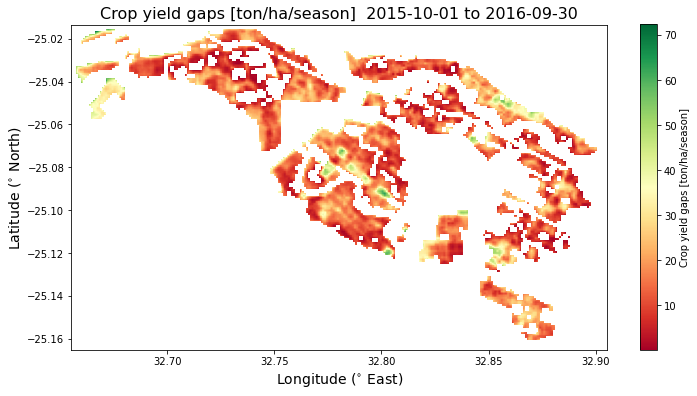

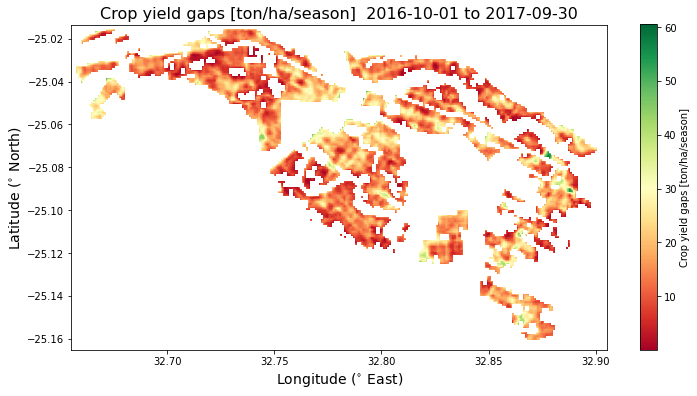

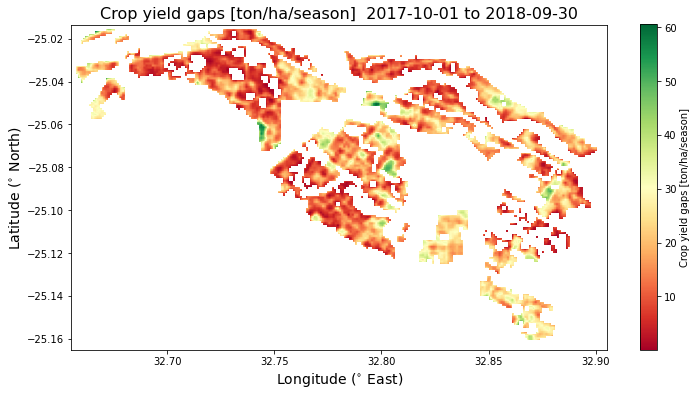

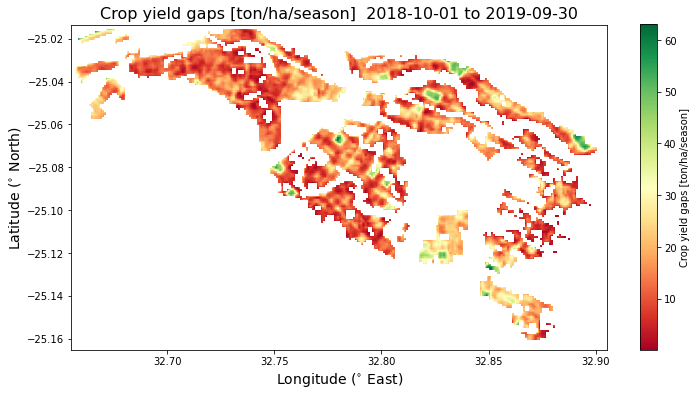

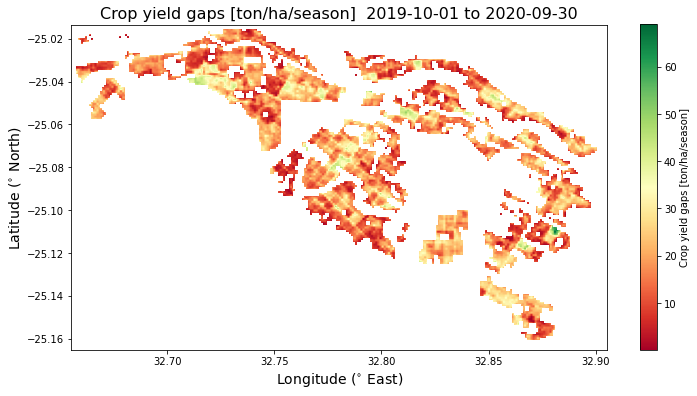

In [22]:
in_fh = input_Yieldfhs [0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhAYield in input_Yieldfhs : 
    Yield = gis.OpenAsArray(in_fhAYield, nan_values=True) 
    
    # productivity targets and produtivity gaps
    Yield_1D    = np.reshape(Yield, Yield.shape[0] * Yield.shape[1])  # reshape the arrays
    TargetYield = round(np.nanpercentile(Yield_1D, TargetPercentile), 1)
    Yieldgap    = np.where( Yield < TargetYield, TargetYield - Yield, np.nan)
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhAYield).split('.')[0].replace('Yield', '').replace('_', ' ')
    
    # save yield gap
    output_folder = output_folder1
    basename      = os.path.basename(in_fhAYield).replace('Yield','YieldGaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, Yieldgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal = Yieldgap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label ='Crop yield gaps [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Crop yield gaps [ton/ha/season] ' + date, fontsize=16)
    plt.show () 
    ;

## *** Crop WP gaps

In [23]:
# Target productivity
TargetPercentile = 95  

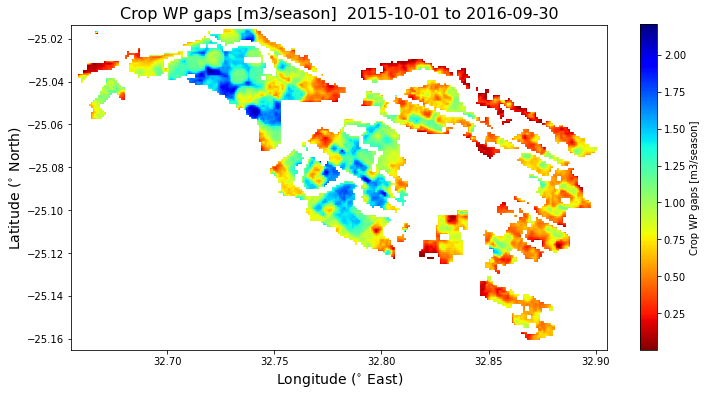

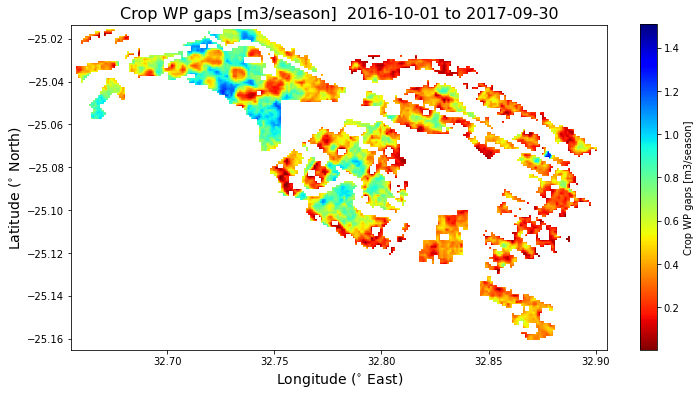

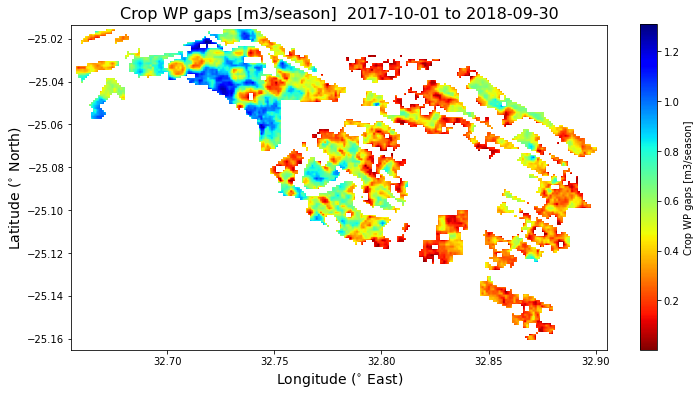

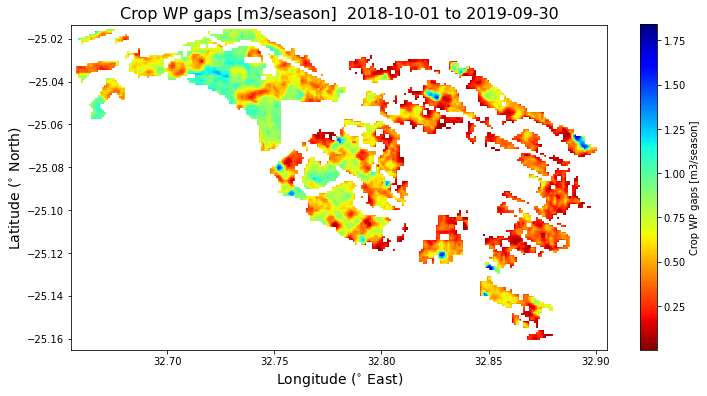

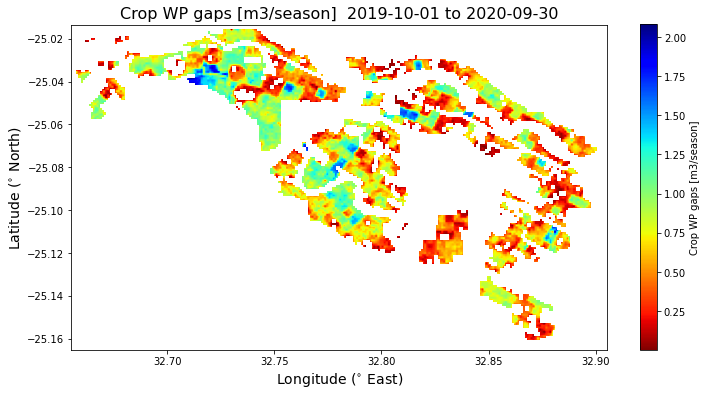

In [24]:
in_fh = input_WPyfhs[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for in_fhWPy in input_WPyfhs: 
    WPy = gis.OpenAsArray(in_fhWPy, nan_values=True) 
    
    # productivity targets and produtivity gaps
    WPy_1D     = np.reshape(WPy, WPy.shape[0] * WPy.shape[1])  # reshape the arrays
    TargetWPy  = round(np.nanpercentile(WPy_1D, TargetPercentile), 2)
    WPygap     = np.where( WPy < TargetWPy, TargetWPy - WPy, np.nan)
    
    # Identify the date from the file name
    date  = os.path.basename(in_fhWPy).split('.')[0].replace('WPy', '').replace('_', ' ')
    
    # save yield gap
    output_folder = output_folder2
    basename      = os.path.basename(in_fhWPy).replace('WPy','WPyGaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn,  WPbgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal =  WPygap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='jet_r', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label = 'Crop WP gaps [m3/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Crop WP gaps [m3/season] ' + date, fontsize= 16)
    plt.show () 
    ;